<a href="https://colab.research.google.com/github/NguyenKiet2k2/AI/blob/main/20146500_CNN_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [ ]:
%cd /content/drive/MyDrive/5KindofFlowers//

/content/drive/MyDrive/5KindofFlowers


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/5KindofFlowers/FLOWERs', target_size=(150,150), batch_size=32, class_mode='categorical')

Found 113 images belonging to 5 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Camtucau': 0,
 'Hoabantrang': 1,
 'Hoadaquy': 2,
 'Hoahuongduong': 3,
 'Hoalavender': 4}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(5,activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                  

In [ ]:
his = model.fit_generator( training_set, epochs=50, steps_per_epoch=len(training_set))

<ipython-input-15-db85b9c3ebea>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator( training_set, epochs=50, steps_per_epoch=len(training_set))


Epoch 1/50
4/4 [==============================] - 44s 10s/step - loss: 46.8581 - accuracy: 0.2301
Epoch 2/50
4/4 [==============================] - 10s 2s/step - loss: 8.0234 - accuracy: 0.3982
Epoch 3/50
4/4 [==============================] - 7s 2s/step - loss: 1.8614 - accuracy: 0.5310
Epoch 4/50
4/4 [==============================] - 10s 2s/step - loss: 1.0977 - accuracy: 0.7168
Epoch 5/50
4/4 [==============================] - 9s 2s/step - loss: 0.7010 - accuracy: 0.7168
Epoch 6/50
4/4 [==============================] - 7s 2s/step - loss: 0.7433 - accuracy: 0.6814
Epoch 7/50
4/4 [==============================] - 11s 2s/step - loss: 0.5907 - accuracy: 0.7522
Epoch 8/50
4/4 [==============================] - 7s 2s/step - loss: 0.5683 - accuracy: 0.7434
Epoch 9/50
4/4 [==============================] - 10s 2s/step - loss: 0.4700 - accuracy: 0.8319
Epoch 10/50
4/4 [==============================] - 9s 2s/step - loss: 0.5405 - accuracy: 0.7965
Epoch 11/50
4/4 [=========================

In [ ]:
model.save('/content/drive/MyDrive/5KindofFlowers/FLOWERs/FLOWERs.h5')
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.43786996603012085
Train Accuracy 0.8230088353157043


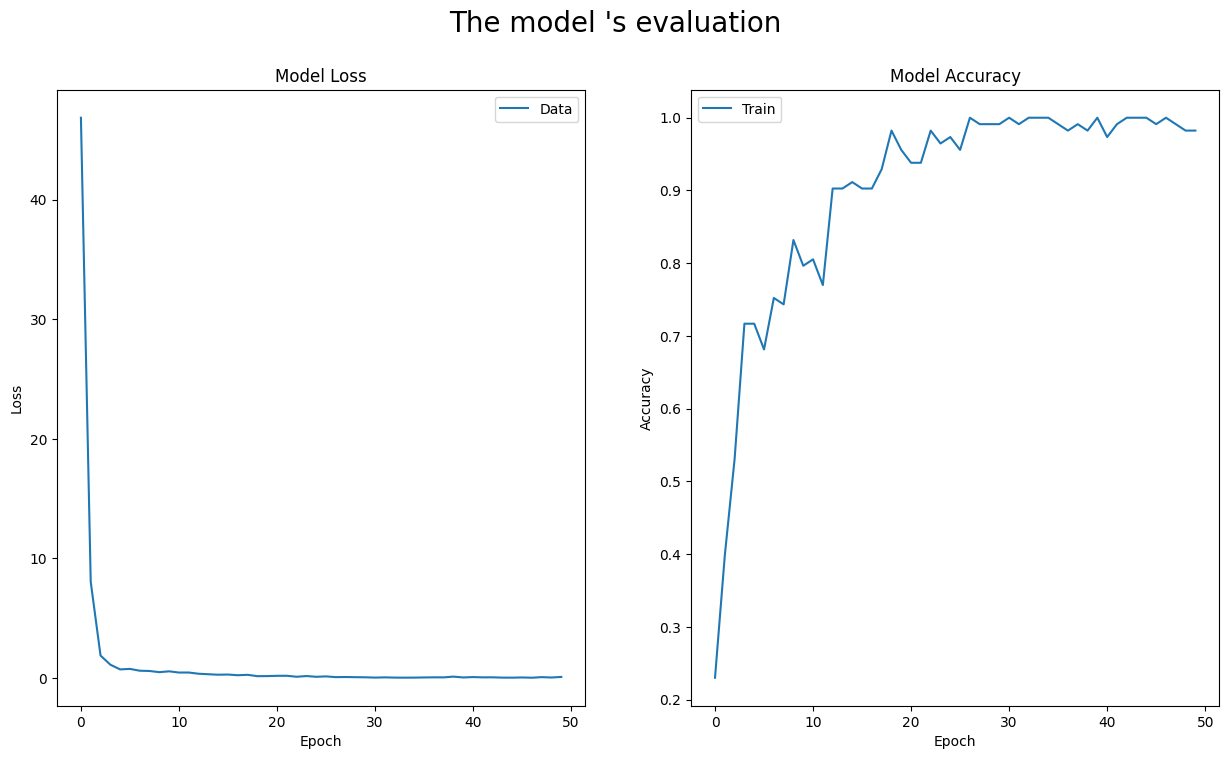

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(his.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(his.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

1/1 [==============================] - 0s 248ms/step
Loài hoa này có tên là: Hoa lavender


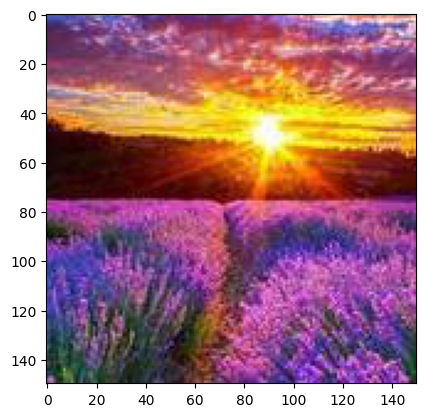

1/1 [==============================] - 0s 65ms/step
Loài hoa này có tên là: Hoa ban trắng


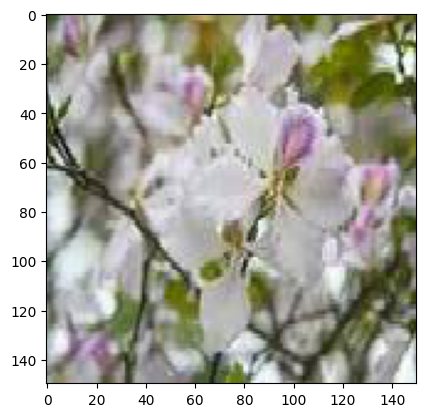

1/1 [==============================] - 0s 45ms/step
Loài hoa này có tên là: Hoa hướng dương


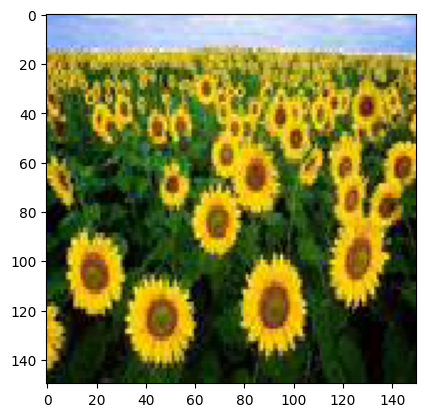

1/1 [==============================] - 0s 45ms/step
Loài hoa này có tên là: Hoa dã quỳ


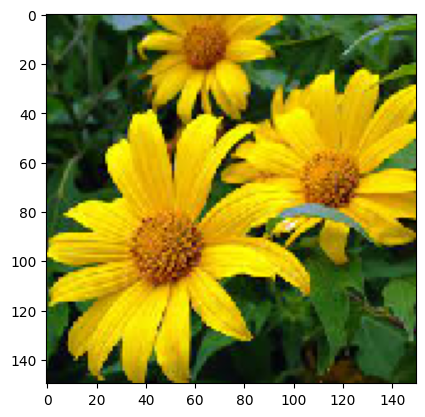

1/1 [==============================] - 0s 45ms/step
Loài hoa này có tên là: Hoa ban trắng


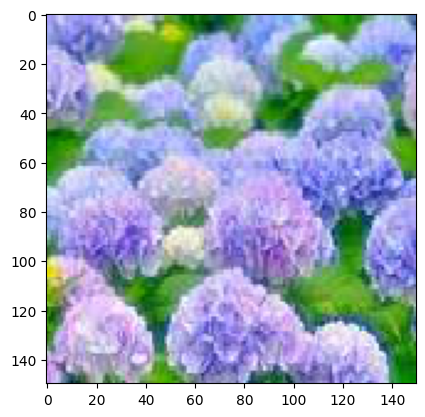

In [ ]:
model1= load_model('/content/drive/MyDrive/5KindofFlowers/FLOWERs/FLOWERs.h5')

folder='/content/drive/MyDrive/5KindofFlowers/FLOWERs/TEST/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model1.predict(img).argmax())
  class_name=['Cẩm tú cầu', 'Hoa ban trắng', 'Hoa dã quỳ', 'Hoa hướng dương', 'Hoa lavender']
  print('Loài hoa này có tên là: {}'.format(class_name[result]))
  plt.show()
